<a href="https://colab.research.google.com/github/xhavien/CCMACLRL_EXERCISE/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from PIL import Image
import os # import the os module
import cv2 # import the cv2 module
import numpy as np # import the numpy module

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
pip install numpy opencv-python scikit-learn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


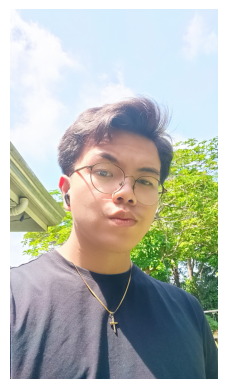

In [4]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Images/Xavier/1.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

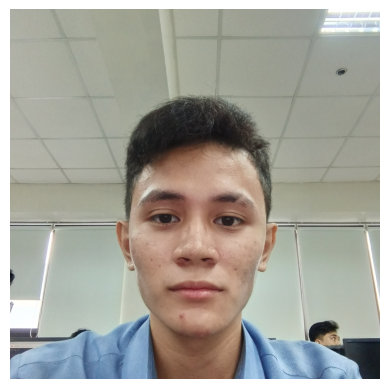

In [5]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Images/Lee-an/1.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [6]:

def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        # Check if the current item is a directory
        if os.path.isdir(person_folder):
            for filename in os.listdir(person_folder):
                img_path = os.path.join(person_folder, filename)
                img = cv2.imread(img_path)
                # Check if the image was loaded successfully
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (100, 100))
                    images.append(img.flatten())
                    labels.append(label)
                else:
                    print(f"Warning: Could not load image at {img_path}")
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/Images/')

In [7]:
images.shape

(49, 10000)

In [8]:
labels.shape

(49,)

In [9]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [11]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [13]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {img_path}. Please check the path and file.")
        return None  # Or handle the error appropriately

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

# Example usage
result = predict_image('/content/drive/My Drive/Test/1.jpg', model)
print(f'Predicted label:', result)

Predicted label: [0]


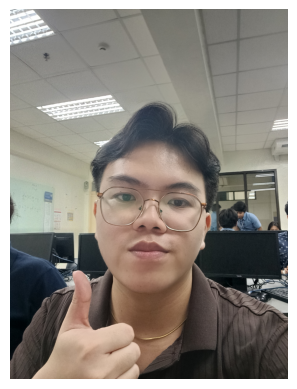

In [14]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Test/1.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

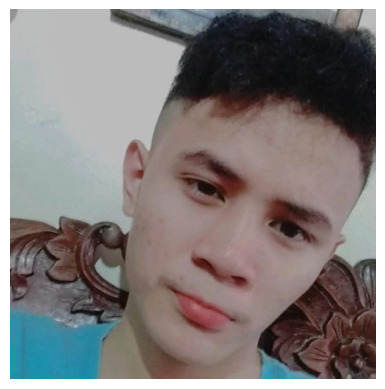

Predicted label: [0]


In [15]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Test/2.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

result = predict_image('/content/drive/My Drive/Test/2.jpg', model)
print(f'Predicted label:', result)

## Dataset File

## Test File

## Sample Submission File

## Generate Results